# Install Packages

This code will require several main types of packaging:
- NLTK: Cleaning disaggregated data
- Gensim: Preprocessing data and creating word embeddings, coherence models and topic models
- LDAvis: Visualizing topic models

Several other packages for wrangling and processing the data, such as io and pandas, will also be installed. 

In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dssadmin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [5]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
import io
import re
from pprint import pprint

# Retrieve and Convert File to Data Frame

This code requires the upload of a previously created dataframe which contains a corpus of disaggregated texts. For optimal use, this dataframe should also contain labels associated with each text (e.g. book or chapter numbers). 

In [7]:
##Define working directory 

#Upload dataframe
import pandas as pd
df = pd.read_csv('chapters_sample.csv')
df

,Unnamed: 0,Book + Chapter,Text
0,0,1958_ALDISS_STARSHIP _Chapter_0,1 PART Quarters
1,1,1958_ALDISS_STARSHIP _Chapter_1,1 A A A A A Again All Almost Although An And A...
2,2,1958_ALDISS_STARSHIP _Chapter_2,1 2 A A A A A A A A A A Added All An An And An...
3,3,1958_ALDISS_STARSHIP _Chapter_3,3 A A A A A A Ah All Almost Although And And A...
4,4,1958_ALDISS_STARSHIP _Chapter_4,2 4 A A A A After All Always An And And And An...
...,...,...,...
77,77,1974_BAYLEY_THEFALLOFCHRONOPOLIS _Chapter_7,1 1 1 4 5 7 A A A A A After After After Ah All...
78,78,1974_BAYLEY_THEFALLOFCHRONOPOLIS _Chapter_8,1 1mperator 8 A A A A A A A A According Accord...
79,79,1974_BAYLEY_THEFALLOFCHRONOPOLIS _Chapter_9,0 1 5 5 5 6 6 6 6 9 A A A A A A A A A A A A A ...
80,80,1974_BAYLEY_THEFALLOFCHRONOPOLIS _Chapter_10,1 10 161 A A A Absol Absol Achronal Achronal A...


In [8]:
#Drop any empty cells
df = df.dropna()
df

,Unnamed: 0,Book + Chapter,Text
0,0,1958_ALDISS_STARSHIP _Chapter_0,1 PART Quarters
1,1,1958_ALDISS_STARSHIP _Chapter_1,1 A A A A A Again All Almost Although An And A...
2,2,1958_ALDISS_STARSHIP _Chapter_2,1 2 A A A A A A A A A A Added All An An And An...
3,3,1958_ALDISS_STARSHIP _Chapter_3,3 A A A A A A Ah All Almost Although And And A...
4,4,1958_ALDISS_STARSHIP _Chapter_4,2 4 A A A A After All Always An And And And An...
...,...,...,...
77,77,1974_BAYLEY_THEFALLOFCHRONOPOLIS _Chapter_7,1 1 1 4 5 7 A A A A A After After After Ah All...
78,78,1974_BAYLEY_THEFALLOFCHRONOPOLIS _Chapter_8,1 1mperator 8 A A A A A A A A According Accord...
79,79,1974_BAYLEY_THEFALLOFCHRONOPOLIS _Chapter_9,0 1 5 5 5 6 6 6 6 9 A A A A A A A A A A A A A ...
80,80,1974_BAYLEY_THEFALLOFCHRONOPOLIS _Chapter_10,1 10 161 A A A Absol Absol Achronal Achronal A...


In [9]:
#Add values in Text column to new list (for further cleaning)
data = df.Text.values.tolist()

# Clean Texts
Below are several preprocessing measures to help improve quality of text used for the topic model. Some may or may not be useful depending on specifications of corpus or goals of topic modeling:
- Stopword Removal: Removes globally common words from corpus which may skew topics; some stopwords may be useful for analysis and some studies show that removing more than the top 10 most common words does not significantly impact topic model results 
- Bigrams/Trigram Modeling: Recognizes common 2- and 3-word phrases to prevent disambiguation (e.g. spaceship vs. space, ship); may misidentify phrases especially in corpora with large/uncommon vocabularies like sci-fi
- Lemmatization: Transforms words to root form to aid recognition; some studies show may be redundant, unnecessary or even inaccurate in conflating differing words with same root meanings 

Additional Readings: 

https://maria-antoniak.github.io/2022/07/27/topic-modeling-for-the-people.html

https://towardsdatascience.com/6-tips-to-optimize-an-nlp-topic-model-for-interpretability-20742f3047e2


In [10]:
#Define list of stopwords
stop_words = stopwords.words('english')

# Add further stopwords by simply "appending" desired words to dictionary
stop_words.append('CHAPTER')

In [11]:
#Remove punctuation
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]

<>:2: DeprecationWarning: invalid escape sequence '\S'
<>:3: DeprecationWarning: invalid escape sequence '\s'
<>:2: DeprecationWarning: invalid escape sequence '\S'
<>:3: DeprecationWarning: invalid escape sequence '\s'
/tmp/ipykernel_124633/3478888187.py:2: DeprecationWarning: invalid escape sequence '\S'
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
/tmp/ipykernel_124633/3478888187.py:3: DeprecationWarning: invalid escape sequence '\s'
  data = [re.sub('\s+', ' ', sent) for sent in data]


In [12]:
#Define function to perform simple preprocessing on text
def sent_to_words(sentences):
    for sentence in sentences:
      yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [13]:
#Run processing function on texts
data_words = list(sent_to_words(data))
#print(data_words[:1])

In [14]:
#Define stopword removal
def remove_stopwords(texts):
   return [[word for word in simple_preprocess(str(doc))
if word not in stop_words] for doc in texts]

#Define function to make bigrams
def make_bigrams(texts):
   return [bigram_mod[doc] for doc in texts]

#def make_trigrams(texts):
#   return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Define function to lemmatize texts
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   texts_out = []
   for sent in texts:
     doc = nlp(" ".join(sent))
     texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
   return texts_out

In [ ]:
#Define bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=1, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [15]:
#Run functions to remove stopwords, make bigrams, and lemmatize text
data_words = remove_stopwords(data_words)
#data_words_bigrams = make_bigrams(data_nostops)
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
#print(data_lemmatized[:4])

In [16]:
data_words

[['part', 'quarters'],
 ['almost',
  'although',
  'another',
  'ansa',
  'anything',
  'aware',
  'bergass',
  'bergass',
  'bergass',
  'besides',
  'better',
  'beyond',
  'bob',
  'bob',
  'bob',
  'cheap',
  'cheap',
  'cheap',
  'cheap',
  'cheer',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complain',
  'complains',
  'complains',
  'complains',
  'complains',
  'complains',
  'complains',
  'complains',
  'complains',
  'consequently',
  'create',
  'daise',
  'dimly',
  'disease',
  'dont',
  'dont',
  'dont',
  'dont',
  'easy',
  'eff',
  'eff',
  'eff',
  'eff'

# Building Dictionary and Corpus
Once the dataset is cleaned, two inputs must be created to run the topic model. Id2word creates a dictionary mapping every word in the corpus with a unique id number. The variable corpus is calculated by determining the frequency of each word in the document. 

In [17]:
#Create dictionary of words in dataset
id2word = corpora.Dictionary(data_words)
texts = data_words

#Calculate term document frequency for each word in dataset
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus)

[[(0, 1), (1, 1)], [(0, 1), (1, 12), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 2), (27, 1), (28, 8), (29, 2), (30, 3), (31, 4), (32, 2), (33, 4), (34, 1), (35, 1), (36, 1), (37, 1), (38, 4), (39, 1), (40, 2), (41, 4), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 6), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 15), (79, 1), (80, 1), (81, 11), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 8), (89, 4), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 5), (101, 1), (102, 3), (103, 1), (104, 1), (105, 2), (106, 1), (107, 1), (108, 1

# Explore Topic Model Parameters

Calculating topic model coherence (i.e. similarity between the highest-scoring words in each topic) is one way to assess the optimal number of topics to use when creating and visualizing topic models. Below are two methods of calculating coherence: C_V, which is calculated based on word co-occurences, and U_Mass, which is calculated based on how frequently documents containing high-scoring words co-occur in the corpus. Both have been used in prior research and either may yield better results, depending on corpus specifications.

In addition to determining the number of topics used in a model, there are several other parameters to consider adjusting. These include: 
- chunksize: Number of documents processed at a time (default = 2000)
- passes: Number of times model is trained on corpus (default = 1)
- iterations: Number of times model "loops" over each document (default = 50)

Setting chunk size to a larger number than that of documents in the model ensures that all documents are processed at once (though this requires enough memory space). A common way to determine the best number of passes and iterations is by training a topic model and checking the "log" to see how many documents have converged (topic/word assignments attain stability). If convergence is low, increase number of passes and interations. In general, as chunksize increases, passes and iterations should increase as well. Also keep in mind that corpus size may effect number of topics--in the cases of smaller corpora, using too many topics will likely make them too general OR too limited to the context of only one text. Consider running multiple models and comparing coherence, perplexity, and top words per topic. 

Additional readings: 
https://aclanthology.org/D12-1087.pdf 
https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html

In [ ]:
#Import logging function 
import logging
logging.basicConfig(filename='gensim.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO)

## C_V Coherence Calculation

The function below calculates C_V coherence scores for n topic models run based on set parameters. Coherence is calculated on a range of 0 < x < 1 where higher-scoring models are assumed more coherent. For example, a model with a score of .50 is more coherent than a model with a .25 score.  

In [41]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, chunksize=1000,
                                           passes=50, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [42]:
# Get coherence value for topic models up to n = 100 topics
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=100, step=3) 

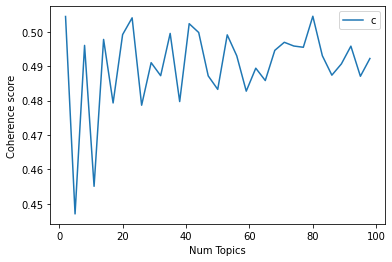

In [43]:
# Show graph plotting coherence score for each topic model 
limit=100; start=2; step=3;
x = range(start, limit, step)
optimal, = plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [50]:
#Get coherence score for each num topics sorted from highest to lowest
#Highest value will be optimal number of topics
Data = {'Num Topics': optimal.get_xdata(), 'Coherence': optimal.get_ydata()}
df_optimal = pd.DataFrame(Data)
df_optimal.sort_values(by='Coherence', ascending=False)
df_optimal.head()

,Num Topics,Coherence
0,2,-0.594090
1,5,-0.581691
2,8,-1.363982
3,11,-0.708328
4,14,-0.684900


## U_Mass Coherence Calculation
The function below calculates U_Mass coherence scores of n topic models run based on set parameters. Coherence is calculated on a range of -14 < x < 14 where higher-scoring models are more coherent. For example, a model with a score of -.4is more coherent than a model with a -.9 score. 


In [45]:
#Try different coherence method-U_Mass Coherence
def compute_coherence_values2(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, chunksize=1000,
                                           passes=50, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values



In [46]:
# Get coherence value for topic models up to n = 100 topics
model_list, coherence_values = compute_coherence_values2(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=100, step=3) 

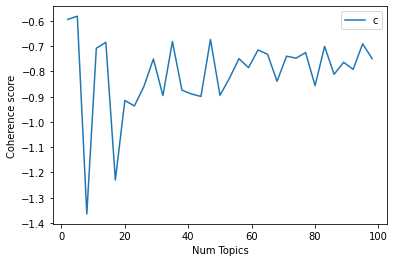

In [47]:
# Show graph plotting coherence score for each topic model 
limit=100; start=2; step=3;
x = range(start, limit, step)
optimal, = plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [49]:
#Get coherence score for each num topics sorted from highest to lowest
#Highest value will be optimal number of topics
Data = {'Num Topics': optimal.get_xdata(), 'Coherence': optimal.get_ydata()}
df_optimal = pd.DataFrame(Data)
df_optimal.sort_values(by='Coherence', ascending=False)
df_optimal.head()

,Num Topics,Coherence
0,2,-0.594090
1,5,-0.581691
2,8,-1.363982
3,11,-0.708328
4,14,-0.684900


# Create Topic Model with Optimal Parameters
Input the parameters of the topic model and run. The model has multiple parameters, including: 
- num_topics: Number of topics the model will generate
- chunksize: Number of documents processed at a time 
- passes: Number of times model is trained on corpus
- iterations: Number of times model "loops" over each document

The default parameters for a gensim topic model are: 
def __init__(self, corpus=None, num_topics=100, id2word=None,
                 distributed=False, chunksize=2000, passes=1, update_every=1,
                 alpha='symmetric', eta=None, decay=0.5, offset=1.0,
                 eval_every=10, iterations=50, gamma_threshold=0.001) 
                 
However, it is likely these will be adjusted based on your corpus size and coherence score. In general, as chunksize increases, passes and iterations should increase as well so the topic distribution updates remain evenly spread across the corpus and convergence is attained by most documents. Also keep in mind that corpus size may effect number of topics--in the cases of smaller corpora, using too many topics will likely make them too general OR too limited to the context of only one text. Consider running multiple models and comparing coherence, perplexity, and top words per topic. 


Additional reading: https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html

In [ ]:
#Create topic model, inserting optimal number into num_topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=2,
                                           chunksize=100,
                                           passes=20,
                                            iterations=100
                                           alpha='auto',
                                           per_word_topics=True) 


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
#Print n number of words in each topic
for idx, topic in lda_model.print_topics(num_words=8):
    print('Topic: {} \nWords: {}'.format(idx, topic))

# Visualize Topic Model

In [ ]:
#The easiest way to create the visualization is to reveal it in the Google Colab notebook and save it as an html file that you can view on your browser. 
%matplotlib inline
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [ ]:
%matplotlib inline
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [ ]:
#Create and view visualization
vis = gensimvis.prepare(lda_model, corpus, id2word)

pyLDAvis.display(vis)

# Examine Topics Per Document

Find the topic with highest percentage in each document in corpus. 

Source: 
https://towardsdatascience.com/topic-modelling-in-python-with-spacy-and-gensim-dc8f7748bdbf

In [ ]:
#Define function that retrieves dominant topic for each document and puts in dataframe
def format_topics_texts(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    text_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                text_topics_df = text_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    text_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    text_topics_df = pd.concat([text_topics_df, contents], axis=1)
    return(text_topics_df)

In [ ]:
#Run dominant topic function on corpus
df_topic_texts_keywords = format_topics_texts(ldamodel=lda_model, corpus=corpus, texts=data_words_nostops)

# Format
df_dominant_topic = df_topic_texts_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

# Find Documents Per Topic
Calculate the top documents attributed to each topic in the model. 

Sources:

https://stackoverflow.com/questions/63777101/topic-wise-document-distribution-in-gensim-lda

https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/topic_methods.ipynb 

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#7.-The-most-representative-sentence-for-each-topic 

In [ ]:
#Add Book + Chapter labels to dataframe for easier ID
doc_names = df['Book + Chapter']
df_topic_texts_keywords = df_topic_texts_keywords.join(doc_names)

In [ ]:
# Get most representative text for each topic 
#Display setting to show more characters in column
pd.options.display.max_colwidth = 100

#Create new dataframe and group topic keywords by dominant topic column
topics_sorted_df = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_texts_keywords.groupby('Dominant_Topic')

#Sort data by percent contribution and select highest n values for each topic
for i, grp in sent_topics_outdf_grpd:
    topics_sorted_df = pd.concat([topics_sorted_df, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

In [ ]:
# Reset Index of new df
topics_sorted_df.reset_index(drop=True, inplace=True)

# Format
topics_sorted_df.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text", "Text Name"]
topics_sorted_df = topics_sorted_df.reindex(columns=['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text Name", "Representative Text"])
# Show
topics_sorted_df.head()

# Word Embedding with Gensim
Sources:

https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92 

https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/

In [ ]:
#Get likelihood that a term belongs to certain topics
lda_model.get_term_topics('said')

In [ ]:
#Run word2vec on cleaned data
from gensim.models import Word2Vec
model = Word2Vec(data_words_nostops, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [ ]:
model['tree']

In [ ]:
#compare similarity between two words
print(model.similarity('tree', 'space'))

print(model.similarity('space', 'sky'))

In [ ]:
#Get most similar words
model.most_similar('ocean')[:5]